In this lab we will look at modeling an Ising system with Monte Carlo.
Most of the Python will be explained, but if you wanted practice, it can be found [here](https://www.learnpython.org/en/Basic_String_Operations). From the short tutorials listed under Python basics, you are to be familiar with:
- Variables & Types
- Lists
- Basic Operators
- Conditions
- Loops
- Functions
- Classes & objects.

# Ising Model 

The Ising model is a lattice of $k$ interacting sites. Each site has a spin $\sigma_k$ which can have a value of +1 or -1. The spins are allowed to interact with their nearest-neighbor spins. The Hamiltonian for the system is given by:

$$
H(\sigma)=-\sum_{\langle i j\rangle} J_{i j} \sigma_{i} \sigma_{j}-\sum_{j} h_{j} \sigma_{j}
$$

where $\langle i j\rangle$ indicate a sum over only nearest neighbors. The interaction between spins is captured in $J$. If $J$ is positive, the system will behave ferromagnetically, and a negative $J$ favors antiferromagnetic interactions. A magnetic field aligned with the spins is represented by $h_j$.

We will start by introducing some code for this model. 

To begin, we need to import the Python modules we will need. If you're not familiar with each of these, here is an overview: 
- `numpy` allows us to perform the necessary math
- `matplotlib` will allows us to visualize our results
- `pandas` will help up tabulate data cleanly
- `time` will allow us to time the simulation
- `pyblock` handles reblocking, which will be discussed later in the notebook

The cell below will ensure you have all necessary packages installed

In [2]:
%pip install numpy matplotlib pyblock pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pyblock
import pandas as pd
import time

We'll also import some helper utilities that we wrote to make things easier for you

In [4]:
import ising_utils as iu

# Initializing the class
The Ising model class has been started for you. 
We have given you two functions:

    1) initialize the model parameters
    2) print the parameters
The functions are described within the functions as comments.
Multiline will surrounded by a set of triple quotation marks (`''' comment '''`), while single line comments are indicated by `# comment`.

If you are not familiar with Python classes, we suggest you review them with the source given above. The data for the model will be kept entirely in the class and the function we will write will be written to manipulate that data.

In [5]:
ip = {"J": None, "h": None, "M": None, "N": None}


def initialize_lattice_state(ip):
    """
    Initializing the lattice of size MxN to all ones
    """
    lattice_state = np.ones((ip["M"], ip["N"]))
    return lattice_state

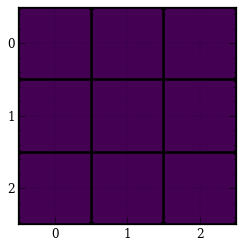

In [9]:
# Initializing a model of 3x3 spins, with J = 1 and h = 0
ip = {"J": 1, "h": 0 , "M": 3, "N": 3}
example_lattice = initialize_lattice_state(ip) 
# visualize the lattice
iu.plot_lattice(example_lattice)

## Question 1:
as a test initialize your own model of dimensions of  5 by 8. Set J = 2 and h = 0.01

In [23]:
# place code to initialize here
ip = {"J": 2, "h": 0.01 , "M": 5, "N": 8}
lattice = initialize_lattice_state(ip) 



In [24]:
# we will test code here
assert np.shape(lattice)[0] == 5
assert np.shape(lattice)[1] == 8
assert ip['J'] == 2
assert ip['h'] == 0.01


## Coding functions for the model
Next, you will be coding your first functions for the model. 

The functions we will need to create are: 
- the ability to flip a specific spin within the lattice
- the ability to go through each lattice site to calculate the energy of the lattice.
- a function to calculate the energy per site.



```python
 def function_name(ARGUMENTS HERE)
 ```
 
 
 We will first start with the function to flip (i.e. at a specific site in the lattice, $ i $, $ j $, the spin will flip and that lattice site will be the negative of itself.)


In [25]:
def flip_spin(lattice_state, i, j):
    """
    Flip spin (i, j)
    i.e. -1 ---> 1
          1 ---> -1
    """
    new_lattice_state = np.copy(lattice_state)
    new_lattice_state[i, j] = -new_lattice_state[i, j]
    return new_lattice_state



# Test 2
As you did above initaite a new 5x5 lattice, with J = 1 and h = 0. 
Place the lattice in a variable called `example_lattice`.
Use the `flip_spin` function you wrote above twice to flip the spin at (0,1) and then at (4,4).


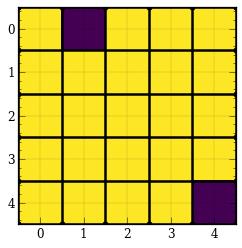

In [68]:
ip = {"J": 1, "h": 0 , "M": 5, "N": 5}
example_lattice = initialize_lattice_state(ip) 
example_lattice = flip_spin(example_lattice, 0,1)
example_lattice = flip_spin(example_lattice, 4,4)
iu.plot_lattice(example_lattice)

assert example_lattice[0,1] == -1
assert example_lattice[4,4] == -1

assert np.sum(example_lattice) == ((ip['M']*ip['N'] )-4)


The next function we want to write is the function to estimate the energy of the entire lattice.
One thing that will affect our 

# Describe periodic boundary conditions 

# expression for energy of a given lattice state

# Example on how to access the python object lattice_state

In [69]:
def calculate_energy_of_site(lattice_state, ip, i, j):
    """
    Calculate energy of spin (i, j)

    Periodic boundary conditions implemented
    """
    spin_here = lattice_state[i, j]  # value of spin here

    # value of spin above, below, left, and right of spin (i, j)
    # for each, if on boundary, we wrap around to the other side
    # of the lattice for periodic boundary conditions
    if j == 0:
        spin_above = lattice_state[i, ip["N"] - 1]
    else:
        spin_above = lattice_state[i, j - 1]

    if j == ip["N"] - 1:
        spin_below = lattice_state[i, 0]
    else:
        spin_below = lattice_state[i, j + 1]

    if i == ip["M"] - 1:
        spin_right = lattice_state[0, j]
    else:
        spin_right = lattice_state[i + 1, j]

    if i == 0:
        spin_left = lattice_state[ip["M"] - 1, j]
    else:
        spin_left = lattice_state[i - 1, j]

    return -ip["h"] * spin_here - ip["J"] * spin_here * (
        spin_above + spin_below + spin_left + spin_right
    )


In [71]:
assert calculate_energy_of_site(example_lattice,ip,0,0) == -2
assert calculate_energy_of_site(example_lattice,ip,0,4) == -2
assert calculate_energy_of_site(example_lattice,ip,4,0) == -2
assert calculate_energy_of_site(example_lattice,ip,4,4) == 4
assert calculate_energy_of_site(example_lattice,ip,2,2) == -4

In [52]:
# desribe what we want from them here in the next code block

In [53]:
def calculate_total_spin(lattice_state):
    """
    Calculate total spin of the lattice
    """
    return np.sum(lattice_state)


def calculate_total_spin_per_spin(lattice_state, ip):
    """
    Calculate total spin of the lattice
    """
    return calculate_total_spin(lattice_state) / (ip["M"] * ip["N"])


def calculate_total_energy(lattice_state, ip):
    """
    Calculate total energy of the lattice
    """
    E = 0.0
    for i in range(ip["M"]):
        for j in range(ip["N"]):
            E += calculate_energy_of_site(lattice_state, ip, i, j)
    # factor of two for overcounting neighboring interactions.
    # but then need to add back -1/2 h \sum s_i
    return (E - (ip["h"] * calculate_total_spin(lattice_state))) / 2.0


def calculate_total_energy_per_spin(lattice_state, ip):
    """
    Calculate energy of lattice normalized by the number of spins
    """
    return calculate_total_energy(lattice_state, ip) / (ip["M"] * ip["N"])



In [54]:
# test code here

# Monte Carlo Simulations

Theoretically, we have made a very simple model for describing interacting systems. 
Additionally, we can now start to use this model for predicting observables. 
For example, for the expectation value of the energy of an $M*N$ lattice, the expectation value would be

$$
\langle E\rangle=\sum_{\alpha} E(\alpha) P(\alpha)
$$

where $E(\alpha)$ is the energy of a fixed state $\alpha$, and  $P(\alpha)$ is the probability of being in that fixed state.
However, the number of fixed states grows as $2^{(N*M)}$ where $N*M$ is the total number of lattice points.
This quickly becomes impractical as the lattice size grows.

To deal with this, we use Monte Carlo sampling to sample states $\alpha$ with probability $P(\alpha)$.

In [55]:
def metropolis_test(sp, E_new, E_old):
    if np.random.random() <= np.exp(-(E_new - E_old) / sp["kT"]):
        return True
    else:
        return False

In [74]:
# describe data type/dictionaries

In [56]:
# simulation parameters
sp = {"num_equil_sweeps": None, "num_sweeps": None, "kT": None}
# simulation results:
sr = {"energy_list": [], "total_spin_list": []}

In [ ]:
# describe the algorithm in words here
# they don't need to code anything.

In [57]:
def sweep(lattice_state, ip, sp):
    for site_i in range(ip["M"]):
        for site_j in range(ip["N"]):
            E_old = calculate_energy_of_site(lattice_state, ip, site_i, site_j)
            # flip spin i and jN
            new_lattice_state = flip_spin(lattice_state, site_i, site_j)
            # calculate updated energy
            E_new = calculate_energy_of_site(new_lattice_state, ip, site_i, site_j)
            # Monte Carlo step
            if metropolis_test(sp, E_new, E_old):
                # accept move
                E_old = E_new
                lattice_state = np.copy(new_lattice_state)
            else:
                # reject move
                # do nothing just continue
                continue
    return lattice_state

In [ ]:
# give these functions.

These functions calculate some of the statistics for you. 
'get_average_energy

In [58]:
def get_average_energy(sr):
    return np.mean(sr["energy_list"])


def get_stderr_energy(sr, sp):
    return np.std(sr["energy_list"]) / np.sqrt(sp["num_sweeps"])


def get_average_spin(sr):
    return np.mean(sr["total_spin_list"])


def get_stderr_spin(sr, sp):
    return np.std(sr["total_spin_list"]) / np.sqrt(sp["num_sweeps"])

However, these expression are serially correlated. For example, the energy for one sweep is not statistically independent from previous or following sweeps. To remove this correlation, one can average over short blocks of data, a process known as reblocking. This removes serial correlation because each block is now statistically independent.

The reblocking implementation of mean and standard error function are included in the ising_utils as:

`iu.get_reblocked_avg_stderr_spin`

`iu.get_reblocked_avg_stderr_energy`

You will see these functions being called later in the simulation.

The next function will run a calculation.
The arguments required are `ip` for the Ising model parameters and `sp` for the simulation parameters.

This function will return a dictionary, `sr` containing the simulation results.
The two statistics to collect per simulation step are the energy of the lattice (sr['energy_list']) and the total sping of the lattice (sr['total_spin_list'])

The calculation takes the following steps:
1) initialize the lattice state
2) A number of equilibration steps are done in which statistics are not collected.
3) A number of production steps are done.


In [59]:
def run_calculation(ip, sp):
    sr = {"energy_list": [], "total_spin_list": []}
    lattice_state = initialize_lattice_state(ip)
    for step in range(sp["num_equil_sweeps"]):
        lattice_state = sweep(lattice_state, ip, sp)
    for step in range(sp["num_sweeps"]):
        lattice_state = sweep(lattice_state, ip, sp)
        # calculate total energy
        e = calculate_total_energy_per_spin(lattice_state, ip)
        sr["energy_list"].append(e)

        # calculate total s2
        s = calculate_total_spin_per_spin(lattice_state, ip)
        sr["total_spin_list"].append(s)
    return sr

# Applications of the class

1) Run an Ising model simulation with the following parameters:

Again, we initialize the python class as: `our_model = IsingModel(n, m, J, h)`

- finite size effects: studying two different lattice sizes
    - what differences do you notice at 10x10 and 30x30
- finding the transition temperature
    - distributions of spins above and below
- Standard deviation changes around phase transitions
- with and without magnetic field

We will be comparing our simulation to that of the analytical result. The analytical result is defined as:



In [60]:
def analytical(x, J):
    analytical_solution = []
    for i in x:
        if i < 2.269:
            analytical_solution.append(
                (1 - np.sinh((2 * J) / i) ** (-4)) ** (1.0 / 8.0)
            )
        else:
            analytical_solution.append(0)

    return analytical_solution

we want to look at a range of $kT$ values. We will look at a set of values to do our simulation, and a finer mesh of points to calculate the analytical solution since that is a quick calculation.

The `np.arange` function generates a list of numbers with a certain spacing between the values. The function takes three arguments, The first argument is the number you want to start with, the second argument is the number you want to finsih your list of numbers on, the third argument is the spacing between the numbers

In [61]:
analytical_kT_list = np.arange(1.2, 3.0, 0.001)
simulation_kT_list = np.arange(1.2, 3.0, 0.1)

In [62]:
start_time = time.time()
kT_list = np.arange(1.2, 3.0, 0.1)
analytical_kT_list = np.arange(1.2, 3.0, 0.001)
avg_s_list = []
stderr_s_list = []
num_equil = 10
num_sample = 150
ip = {"N": 10, "M": 10, "J": 1, "h": 0.01}
s_analytical = analytical(analytical_kT_list, ip["J"])

kT=1.2
{'energy_list': [-2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -1.9297999999999973, -2.009999999999997, -1.9297999999999975, -1.9297999999999975, -2.009999999999997, -2.009999999999997, -1.9297999999999973, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -1.9297999999999975, -1.9297999999999973, -2.009999999999997, -2.009999999999997, -2.009999999999997, -1.9297999999999975, -1.9297999999999975, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -1.8495999999999972, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -1.9297999999999975, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -2.009999999999997, -1.929

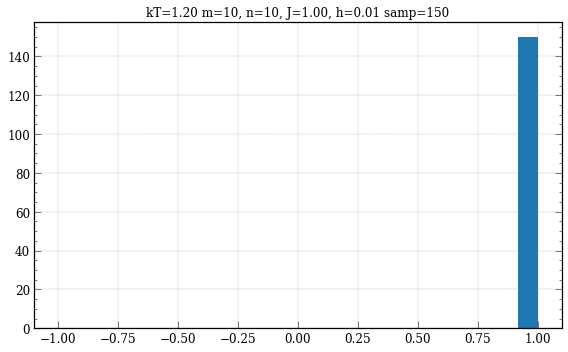

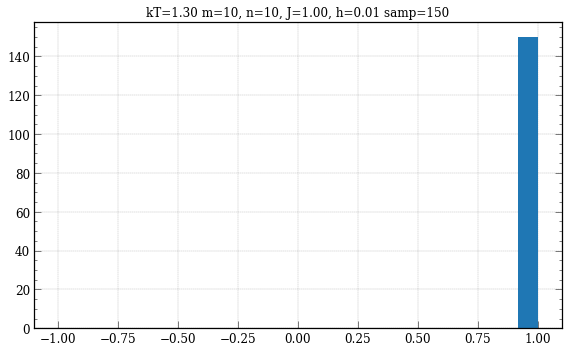

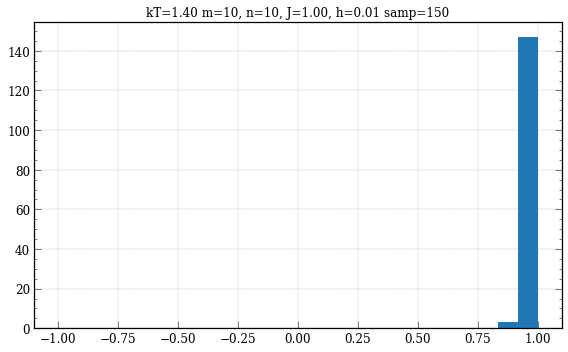

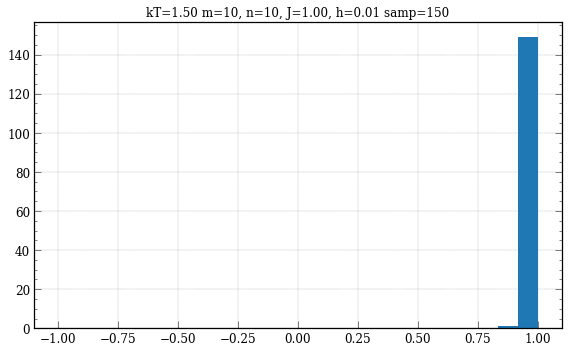

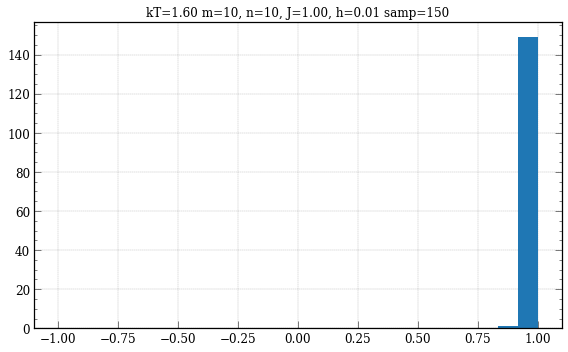

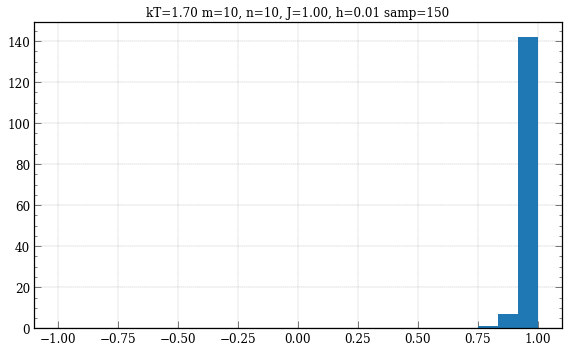

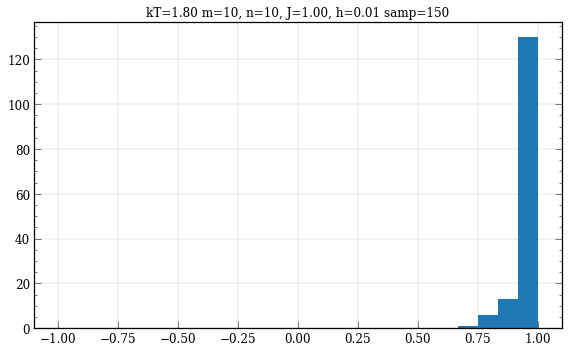

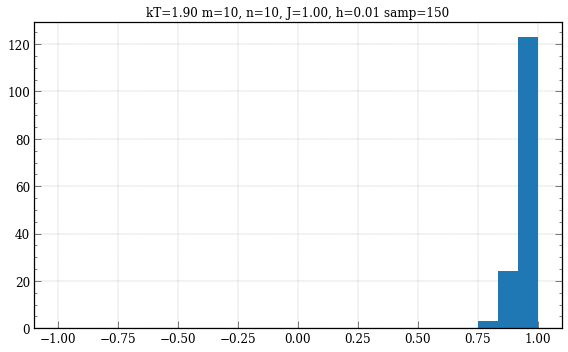

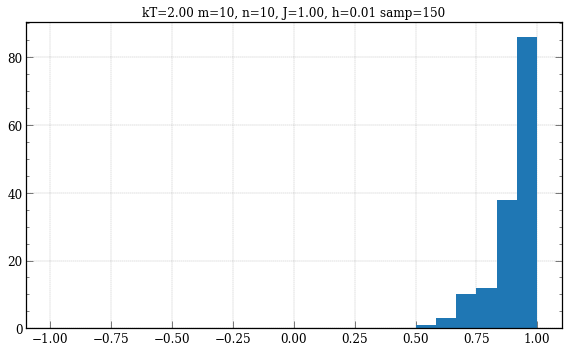

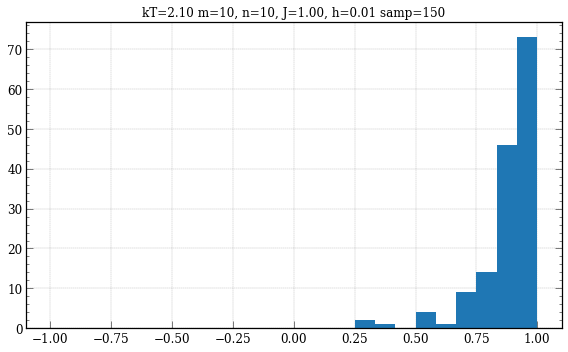

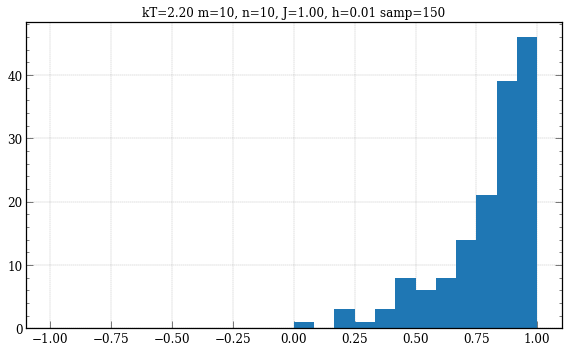

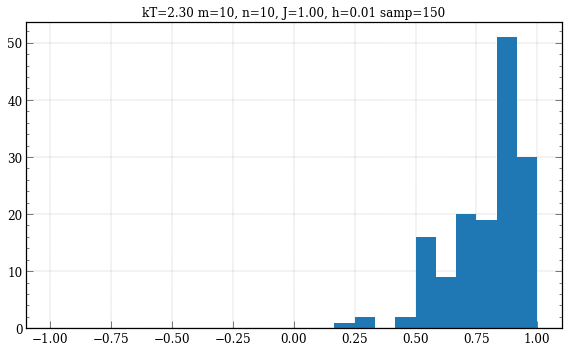

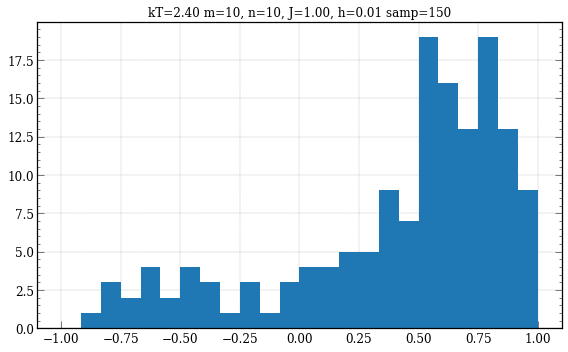

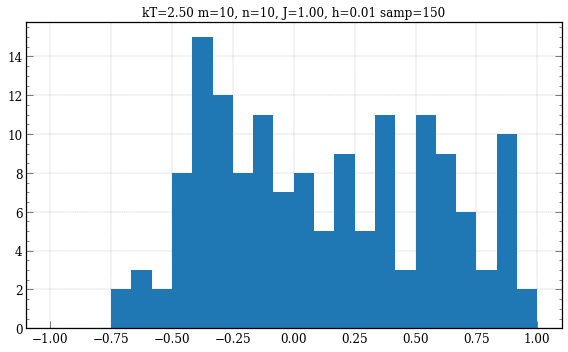

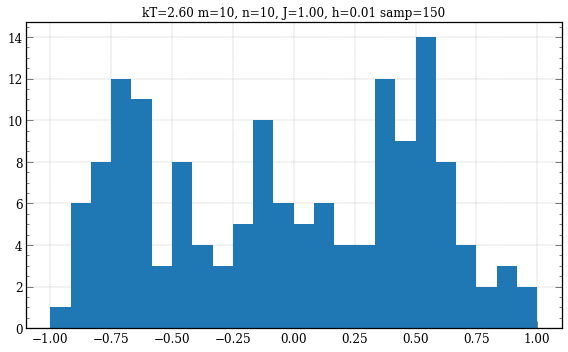

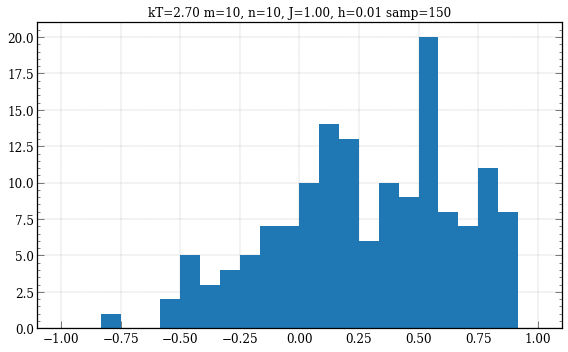

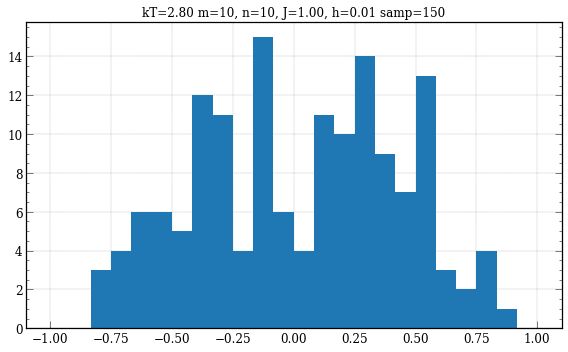

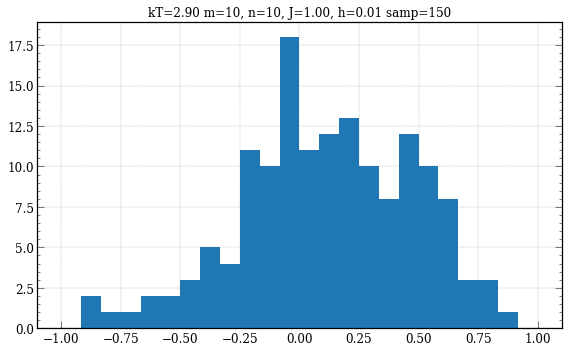

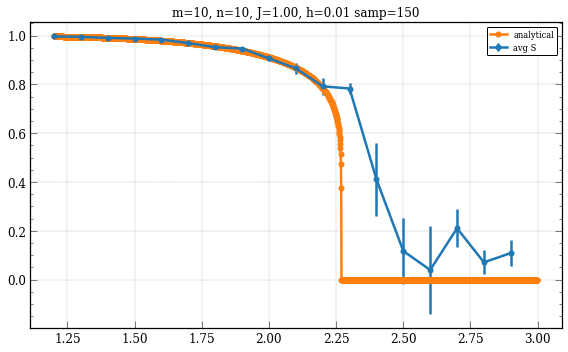

In [63]:
for kT in kT_list:
    print("kT={}".format(kT))
    sp = {"num_equil_sweeps": num_equil, "num_sweeps": num_sample, "kT": kT}

    sr = run_calculation(ip, sp)
    print(sr)
    mean, std_err = iu.get_reblocked_avg_stderr_spin(sr, sp)
    print("kT={}    mean {}    std_err {}".format(kT, mean, std_err))

    avg_s_list.append(np.abs(mean))
    stderr_s_list.append(std_err)
    fig, ax = plt.subplots(tight_layout=True)
    fig.set_size_inches(8, 5)
    n_bins = 25
    bins = np.linspace(-1, 1, n_bins)
    ax.hist(sr["total_spin_list"], bins=bins)
    ax.set_title(
        "kT={:>4.2f} m={:>02d}, n={:>02d}, J={:>4.2f}, h={:>4.2f} samp={}".format(
            sp["kT"], ip["M"], ip["N"], ip["J"], ip["h"], sp["num_sweeps"]
        )
    )
    ax.set_xlim(-1.1, 1.1)
    plt.tight_layout()
    plt.savefig(
        "metropolis_s_hist_kT_{:4.2f}_n_{:>02d}_m_{:>02d}_J_{:>4.2f}_h_{:>4.2f}_samp_{}.png".format(
            sp["kT"], ip["M"], ip["N"], ip["J"], ip["h"], sp["num_sweeps"]
        ),
        dpi=300,
    )
    # plt.show()
    s = pd.Series(sr["total_spin_list"])
    print("avg s autocorr = {}".format(s.autocorr()))
plt.figure(figsize=(8, 5))
plt.errorbar(kT_list, avg_s_list, stderr_s_list, label="avg S")
plt.plot(analytical_kT_list, s_analytical, label="analytical")
plt.title(
    "m={:>02d}, n={:>02d}, J={:>4.2f}, h={:>4.2f} samp={}".format(
        ip["M"], ip["N"], ip["J"], ip["h"], sp["num_sweeps"]
    )
)

plt.legend()
plt.tight_layout()
plt.savefig(
    "metropolis_avg_s_m_{:>02d}_n_{:>02d}_J_{:>4.2f}_h_{:>4.2f}_samp_{}.png".format(
        ip["M"], ip["N"], ip["J"], ip["h"], sp["num_sweeps"]
    ),
    dpi=300,
)
# plt.show()

print("Runtime (s) = {}".format(time.time() - start_time))
# plt.show()

### References:

code: 
    
theory: https://arxiv.org/pdf/0803.0217.pdf